In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Importing necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from PIL import Image
import os
import cv2 as cv

In [ ]:
df_error_profiles = pd.read_csv('/content/gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/March_2024_finding_boxes_algo/Excel_Sheet_of_Different_Error_Types/Analysis_on_Error_Types_Data_Dict/Different_Error_Types_Data_Dict_1.csv')
df_error_profiles.head()

Page Number inside the Article         Article Name  \
0                               3  1936ApJ____83__272M   
1                              10  1993ApJ___404__206R   
2                               1  1965ApJ___142_1028L   
3                              11  1935ApJ____81__312M   
4                               2  1974ApJ___189__509L   

  Detectron2 found table/math formulas/text  \
0                                       NaN   
1                                         x   
2                                         x   
3                                       NaN   
4                                       NaN   

  Detectron2 figure found, that is a square shape visible by eye  \
0                                                NaN               
1                                                NaN               
2                                                NaN               
3                                                NaN               
4                                                NaN               

  Detectron2 figure found, but not a square shape  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Detectron2 figure found, but is spectra  \
0                                       x   
1                                     NaN   
2                                     NaN   
3                                       x   
4                                       x   

  Detectron2 figure found, but only axis labels (no square)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

  Detectron2 figure found, but no square found (but is visible by eye)  \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

  Multiple Squares found by D2 for a single figure  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  Multiple Squares found by D2 for a single table  ... Overlapping d2 boxes  \
0                                             NaN  ...                  NaN   
1                                             NaN  ...                  NaN   
2                                             NaN  ...                  NaN   
3                                             NaN  ...                  NaN   
4                                             NaN  ...                  NaN   

  D2 box does not overlap with full figure/table  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  D2 box includes more than the figure/table (e.g., extra text)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

  Squarefinder box is outside th

### Exploratory Data Analysis:

In [ ]:
df_error_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 29 columns):
 #   Column                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                            --------------  ----- 
 0   Page Number inside the Article                                                                                                                    406 non-null    int64 
 1   Article Name                                                                                                                                      406 non-null    object
 2   Detectron2 found table/math formulas/text                                                                                                         91 non-null     object
 3   Detectron2 figure fo

In [ ]:
print(df_error_profiles.isnull().sum())

Page Number inside the Article                                                                                                                        0
Article Name                                                                                                                                          0
Detectron2 found table/math formulas/text                                                                                                           315
Detectron2 figure found, that is a square shape visible by eye                                                                                      377
Detectron2 figure found, but not a square shape                                                                                                     372
Detectron2 figure found, but is spectra                                                                                                             391
Detectron2 figure found, but only axis labels (no square)                               

In [ ]:
# Fill NaN values with '0' for all columns
df_error_profiles_filled = df_error_profiles.fillna(0)

# Replace 'X' values with 1
df_error_profiles_filled = df_error_profiles_filled.replace('x', 1)

# Drop the column 'Detectron 2 found figure correctly (Yes, No, or Other)'
df_error_profiles_filled = df_error_profiles_filled.drop(columns=['Detectron 2 found figure correctly (Yes, No, or Other)'])

# Display first few rows of the dataframe after filling NaN values and replacing 'X' values
df_error_profiles_filled.head()

Page Number inside the Article         Article Name  \
0                               3  1936ApJ____83__272M   
1                              10  1993ApJ___404__206R   
2                               1  1965ApJ___142_1028L   
3                              11  1935ApJ____81__312M   
4                               2  1974ApJ___189__509L   

   Detectron2 found table/math formulas/text  \
0                                          0   
1                                          1   
2                                          1   
3                                          0   
4                                          0   

   Detectron2 figure found, that is a square shape visible by eye  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   Detectron2 figure found, but not a square shape  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Detectron2 figure found, but is spectra  \
0                                        1   
1                                        0   
2                                        0   
3                                        1   
4                                        1   

   Detectron2 figure found, but only axis labels (no square)  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   Detectron2 figure found, but no square found (but is visible by eye)  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                                  0                      
4                                                  0                      

   Multiple Squares found by D2 for a single figure  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Multiple Squares found by D2 for a single table  ...  \
0                                                0  ...   
1                                                0  ...   
2                                                0  ...   
3                                                0  ...   
4                                                0  ...   

   Squarefinder box is not correct shape  Overlapping d2 boxes  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     0   
4                                      0                     0   

   D2 box does not overlap with full figure/table  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   D2 box includes more than the figure/table (e.g., extra text)  \
0                                         

In [ ]:
df_error_profiles_filled.describe()

Page Number inside the Article  \
count                      406.000000   
mean                        11.928571   
std                         26.820617   
min                          0.000000   
25%                          3.000000   
50%                          7.000000   
75%                         12.000000   
max                        344.000000   

       Detectron2 found table/math formulas/text  \
count                                 406.000000   
mean                                    0.224138   
std                                     0.417528   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       Detectron2 figure found, that is a square shape visible by eye  \
count                                         406.000000                
mean                                            0.071429                
std                                             0.257857                
min                                             0.000000                
25%                                             0.000000                
50%                                             0.000000                
75%                                             0.000000                
max                                             1.000000                

       Detectron2 figure found, but not a square shape  \
count                                       406.000000   
mean                                          0.083744   
std                                           0.277345   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           0.000000   
max                                           1.000000   

       Detectron2 figure found, but is spectra  \
count                               406.000000   
mean                                  0.036946   
std                                   0.188862   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       Detectron2 figure found, but only axis labels (no square)  \
count                                         406.000000           
mean                                            0.034483           
std                                             0.182691           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                             0.000000           
max                                             1.000000           

       Detectron2 figure found, but no square found (but is visible by eye)  \
count                                         406.000000                      
mean                                            0.004926                      
std                                             0.070100                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                             0.000000                      
max                                             1.000000                      

       Multiple Squares found by D2 for a single figure  \
count                                        406.000000   
mean                                           0.049261   
std                               

In [ ]:
df_error_profiles_filled.shape

(406, 28)

In [ ]:
df_error_profiles_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 28 columns):
 #   Column                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                            --------------  ----- 
 0   Page Number inside the Article                                                                                                                    406 non-null    int64 
 1   Article Name                                                                                                                                      406 non-null    object
 2   Detectron2 found table/math formulas/text                                                                                                         406 non-null    int64 
 3   Detectron2 figure fo

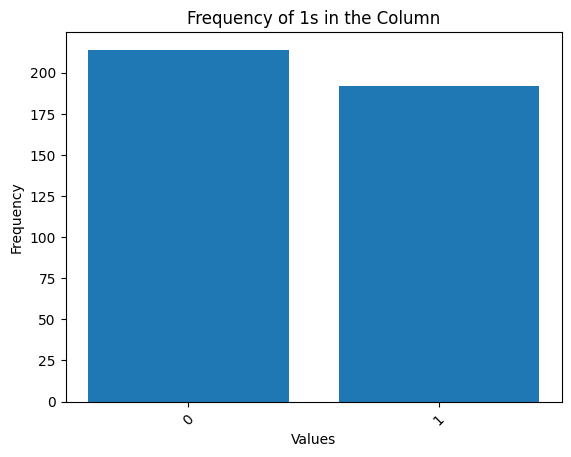

In [ ]:
# Correct new code:
counts = df_error_profiles_filled['All squares found correctly (should not be tagged as an error) by both D2 and Sq Finder'].value_counts()

# Plot the bar chart
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of 1s in the Column')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

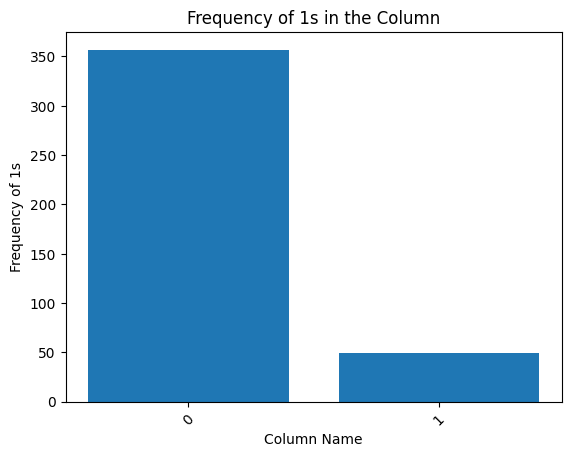

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_error_profiles_filled is your DataFrame

# Count the occurrences of '1' in the specified column
counts = df_error_profiles_filled['Squarefinder finds a square that is incorrect (is a circle, rectangle, or is a table, or is a text box, or is the incorrect square for that box)'].value_counts()

# Plot the bar chart
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Column Name')
plt.ylabel('Frequency of 1s')
plt.title('Frequency of 1s in the Column')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## X-Axis should be all column names and y-axis should be values, may be data transformation like Transpose or group by wil be needed for further analysis

## Correlated with other errors

## Multiple errors for one page

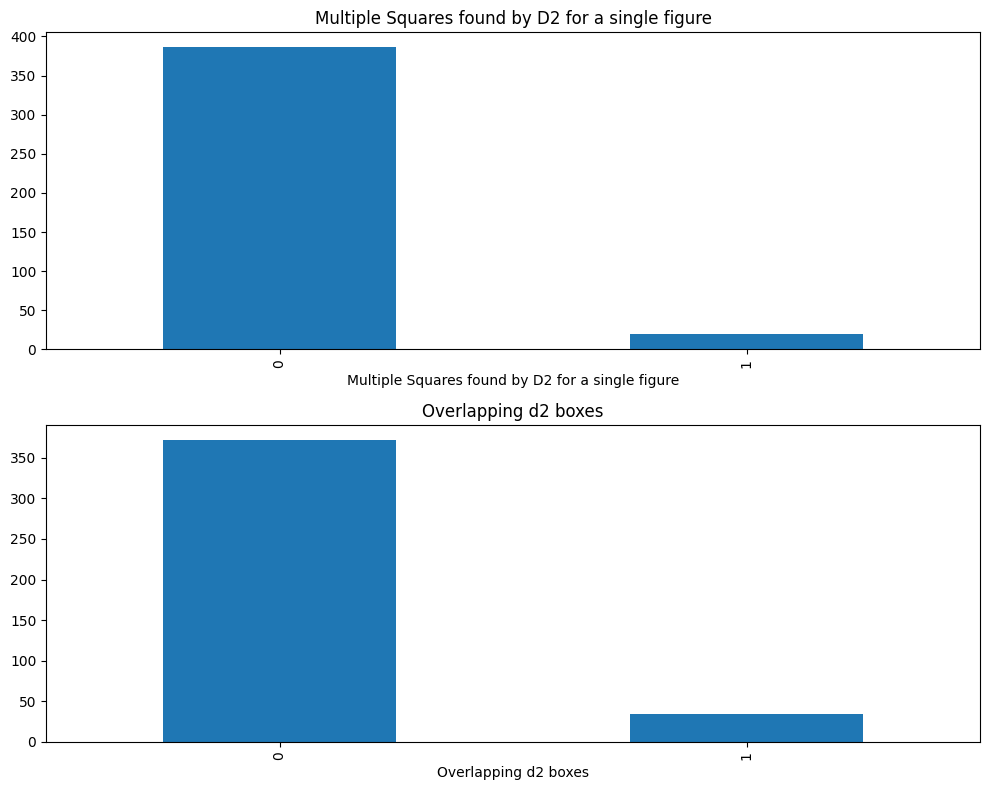

In [ ]:
# Extract the two columns
column1 = 'Multiple Squares found by D2 for a single figure'
column2 = 'Overlapping d2 boxes'

# Create a figure and axes object
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot using pandas
df_error_profiles_filled[column1].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title(column1)

df_error_profiles_filled[column2].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title(column2)

# Add labels and show plot
plt.tight_layout()
plt.show()

### Correlation 1 between Multiple Squares found by D2 for a single figure and Overlapping d2 boxes

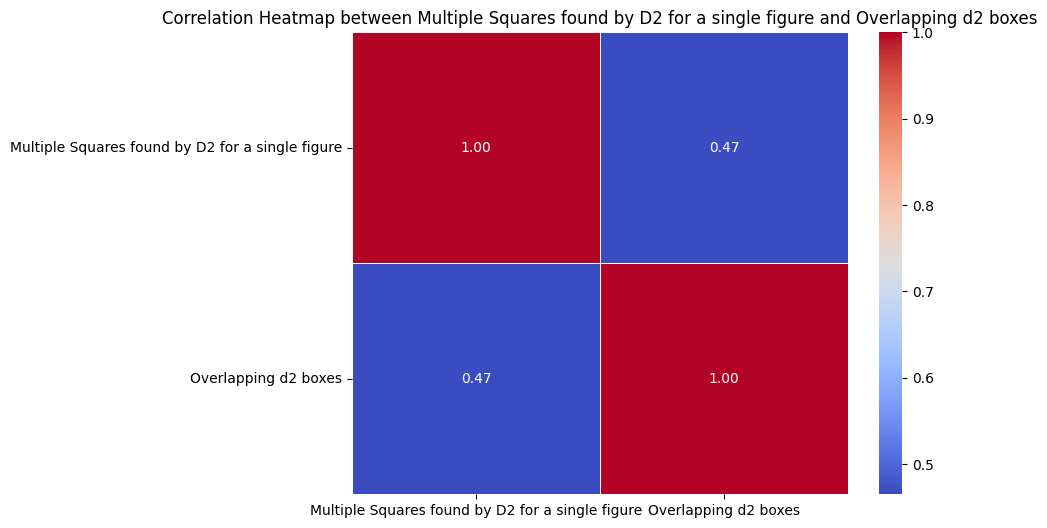

In [ ]:
# Extract the two columns
column1 = 'Multiple Squares found by D2 for a single figure'
column2 = 'Overlapping d2 boxes'

# Create a DataFrame with the two columns
df = df_error_profiles_filled[[column1, column2]]

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between {} and {}'.format(column1, column2))
plt.show()

### Correlation 2 between 'All squares found correctly (should not be tagged as an error) by both D2 and Sq Finder' and 'All multi-panel squares found correctly by Square Finder (not generally an error)'

In [ ]:
column1 = 'All squares found correctly (should not be tagged as an error) by both D2 and Sq Finder'
column2 = 'All multi-panel squares found correctly by Square Finder (not generally an error)'

# Create a DataFrame with the two columns
df = df_error_profiles_filled[[column1, column2]]

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between {} and {}'.format(column1, column2))
plt.show()

### Correlation 3 between 'Some squares of multi-panel plot not found by Sq Finder' and 'Squarefinder does not find a square that is visible by eye'

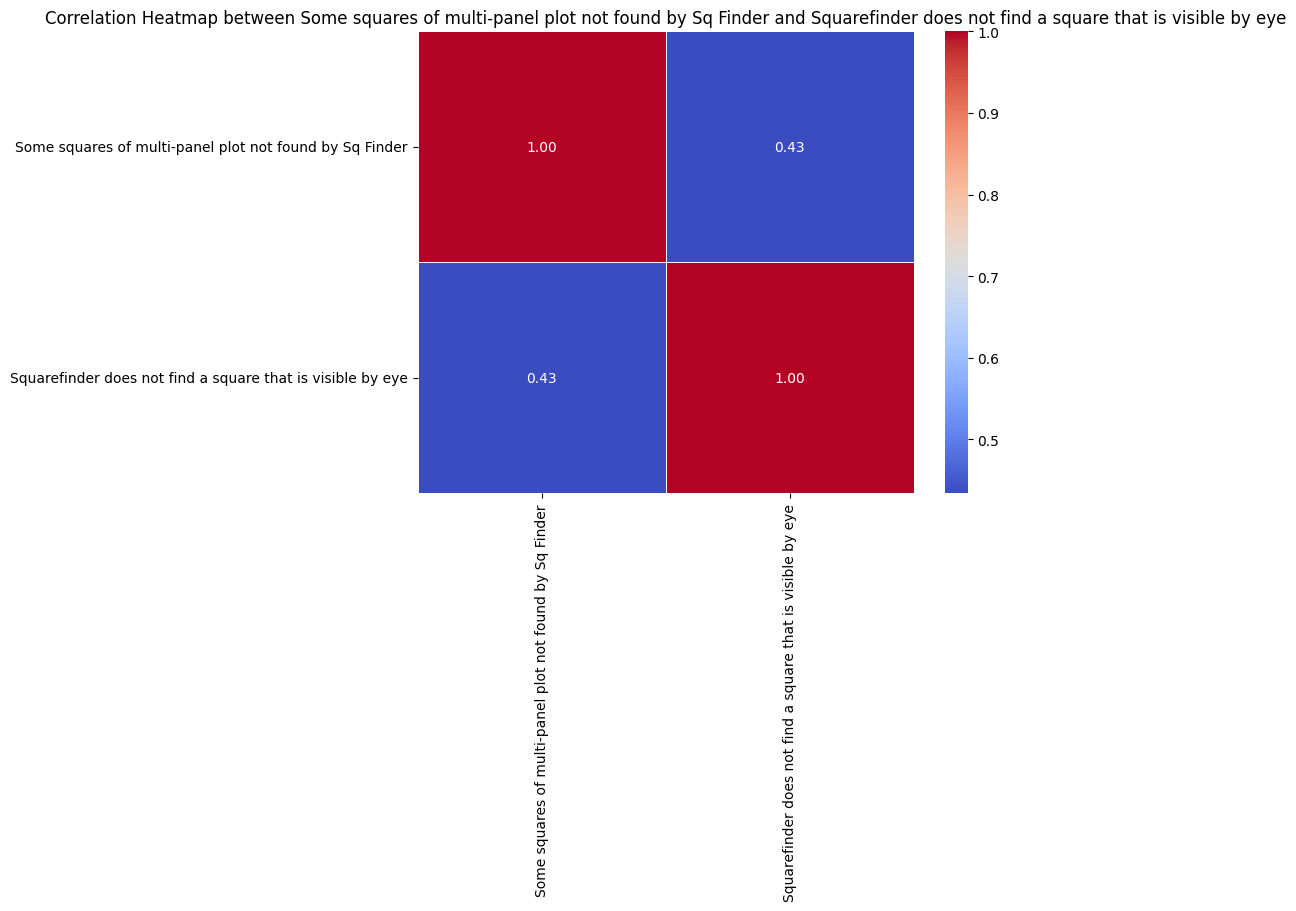

In [ ]:
col1 = 'Some squares of multi-panel plot not found by Sq Finder'
col2 = 'Squarefinder does not find a square that is visible by eye'

# Create a DataFrame with the two columns
df = df_error_profiles_filled[[col1, col2]]

# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between {} and {}'.format(col1, col2))
plt.show()

In [ ]:
df_error_profiles_filled.columns

Index(['Page Number inside the Article', 'Article Name',
       'Detectron2 found table/math formulas/text',
       'Detectron2 figure found, that is a square shape visible by eye',
       'Detectron2 figure found, but not a square shape',
       'Detectron2 figure found, but is spectra',
       'Detectron2 figure found, but only axis labels (no square)',
       'Detectron2 figure found, but no square found (but is visible by eye)',
       'Multiple Squares found by D2 for a single figure',
       'Multiple Squares found by D2 for a single table',
       'All squares found correctly (should not be tagged as an error) by both D2 and Sq Finder',
       'Squarefinder finds a square that is incorrect (is a circle, rectangle, or is a table, or is a text box, or is the incorrect square for that box)',
       'Squarefinder does not find a square that is visible by eye',
       'Squarefinder finds overlapping boxes (blue squares within squares)',
       'Squarefinder boxes are correct, but no 

In [ ]:
# Drop specified columns and assign the modified DataFrame to 'new_df_error_profiles_filled'
columns_to_drop = ['Page Number inside the Article', 'Article Name', 'Sq Finder finds a single figure', 'Broad Error Categories', 'Notes', "Jill's Notes"]
new_df_error_profiles_filled = df_error_profiles_filled.drop(columns=columns_to_drop)

In [ ]:
# Calculate the correlation matrix
corr = new_df_error_profiles_filled.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of all DataFrame Columns')
plt.show()

In [ ]:
# Drop specified columns and assign the modified DataFrame to 'new_df_error_profiles_filled'
columns_to_drop_1 = ['Page Number inside the Article', 'Sq Finder finds a single figure', 'Broad Error Categories', 'Notes', "Jill's Notes"]
df_error_profiles_filled_1 = df_error_profiles_filled.drop(columns=columns_to_drop_1)

In [ ]:
df_error_profiles_filled_1.shape

(406, 23)

In [ ]:
df_error_profiles_filled_1.head(15)

Article Name  Detectron2 found table/math formulas/text  \
0   1936ApJ____83__272M                                          0   
1   1993ApJ___404__206R                                          1   
2   1965ApJ___142_1028L                                          1   
3   1935ApJ____81__312M                                          0   
4   1974ApJ___189__509L                                          0   
5   1895ApJ_____2____1L                                          1   
6   1967ApJ___150__313R                                          0   
7   1976ApJ___205R_308K                                          1   
8   1955ApJ___122___72A                                          0   
9   1997AJ____114_2664S                                          0   
10  1993ApJ___402__280B                                          0   
11  1972ApJ___172__213C                                          1   
12  1981ApJ___246__647R                                          1   
13  1947ApJ___105__408K                                          0   
14  1975AJ_____80__683H                                          1   

    Detectron2 figure found, that is a square shape visible by eye  \
0                                                   0                
1                                                   0                
2                                                   0                
3                                                   0                
4                                                   0                
5                                                   0                
6                                                   0                
7                                                   0                
8                                                   1                
9                                                   1                
10                                                  0                
11                                                  0                
12                                                  0                
13                                                  0                
14                                                  0                

    Detectron2 figure found, but not a square shape  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
5                                                 0   
6                                                 0   
7                                                 0   
8                                                 0   
9                                                 0   
10                                                1   
11                                                0   
12                                                0   
13                                                1   
14                                                0   

    Detectron2 figure found, but is spectra  \
0                                         1   
1                                         0   
2                                         0   
3                                         1   
4                                         1   
5                                         0   
6                                         0   
7                                         0   
8                                         0   
9                                         0   
10                                        0   
11                                        0   
12                                        0   
13                                        0   
14                                        0   

    Detectron2 figure found, but only axis labels (no square)  \
0                                                   0           
1    

### Count of different multiple error for one single page and then plotting it:

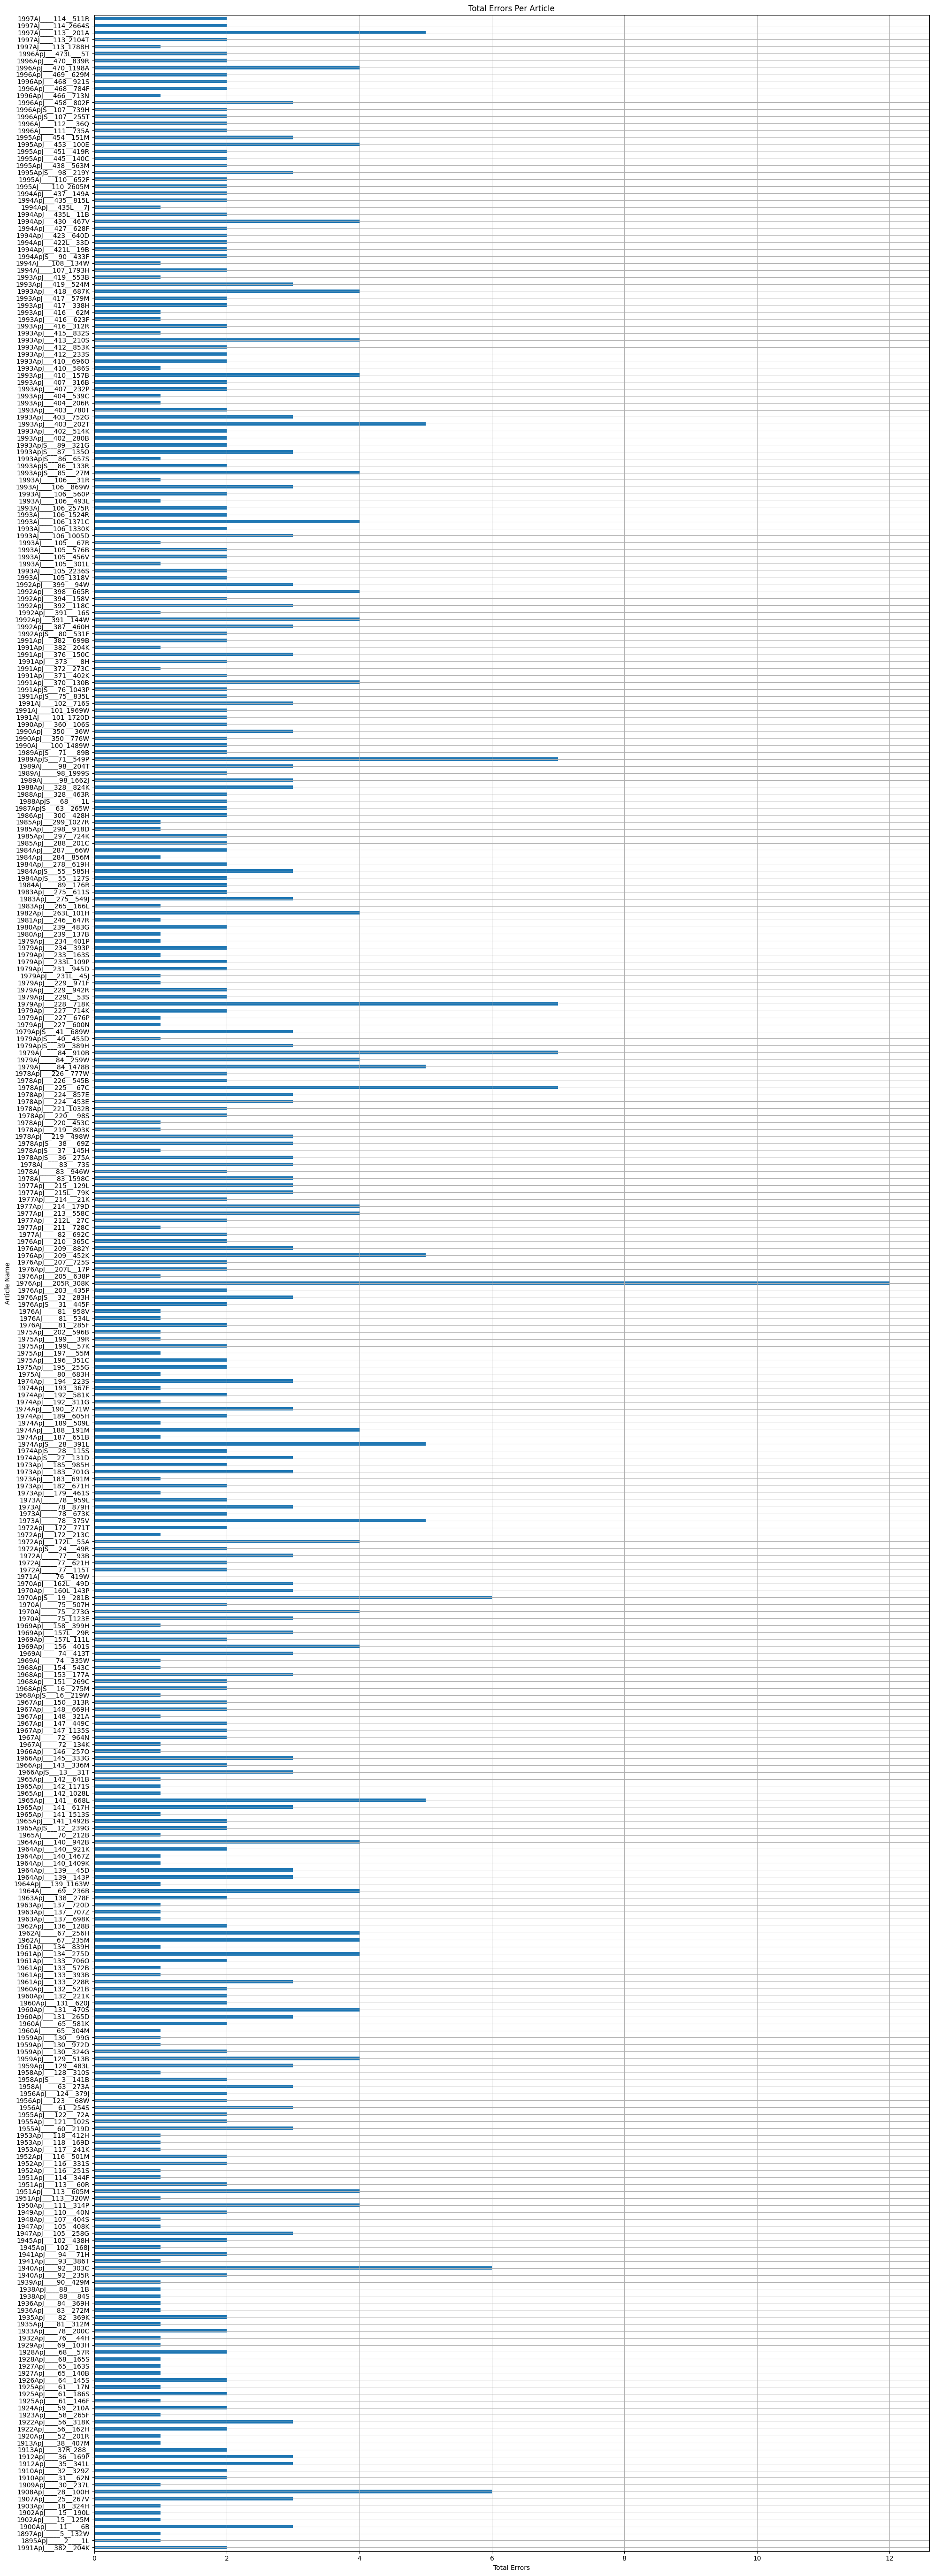

In [ ]:
# Try 2.2
# Group by Article Name and sum errors
errors_per_article = df_error_profiles_filled_1.groupby('Article Name').sum()
# print(error_per_article)
# Calculate total errors per Article
errors_per_article['Total Errors'] = errors_per_article.sum(axis=1)

# Plot errors per PDF with adjusted height for readability # figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20, 55))  # Adjust the height as needed
errors_per_article['Total Errors'].plot(kind='barh', xlabel='Total Errors', ylabel='Article Name', title='Total Errors Per Article')
plt.tight_layout()
plt.grid()
plt.show()

### Count of Errors per column: Histogram

In [ ]:
# Calculate the count of errors per column (excluding the first two columns)
error_columns = df_error_profiles_filled_1.columns[1:] # As the first column is 'Article Name'
error_counts = df_error_profiles_filled_1[error_columns].sum()

# Plot the histogram of error counts per column
plt.figure(figsize=(20, 10))  # Adjust the size for better readability
error_counts.plot(kind='bar')
plt.xlabel('Error Types')
plt.ylabel('Count of Errors')
plt.title('Count of Errors per Column')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('/content/gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/March_2024_finding_boxes_algo/Excel_Sheet_of_Different_Error_Types/Analysis_on_Error_Types_Data_Dict/Saved_Viz_Error_Types/Count_of_Errors_Per_Column.pdf', bbox_inches='tight')

# Show the plot, always use plt.show() command after saving the figure so that as plot.show() clears the figure after displaying it
plt.show()

<ipython-input-27-4ebfffafa6fb>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


### Frequency of errors in each Column, tried saving a PDF file for it:

### Repeated code below, can ignore it, or delete it

<ipython-input-25-66a8610ab451>:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


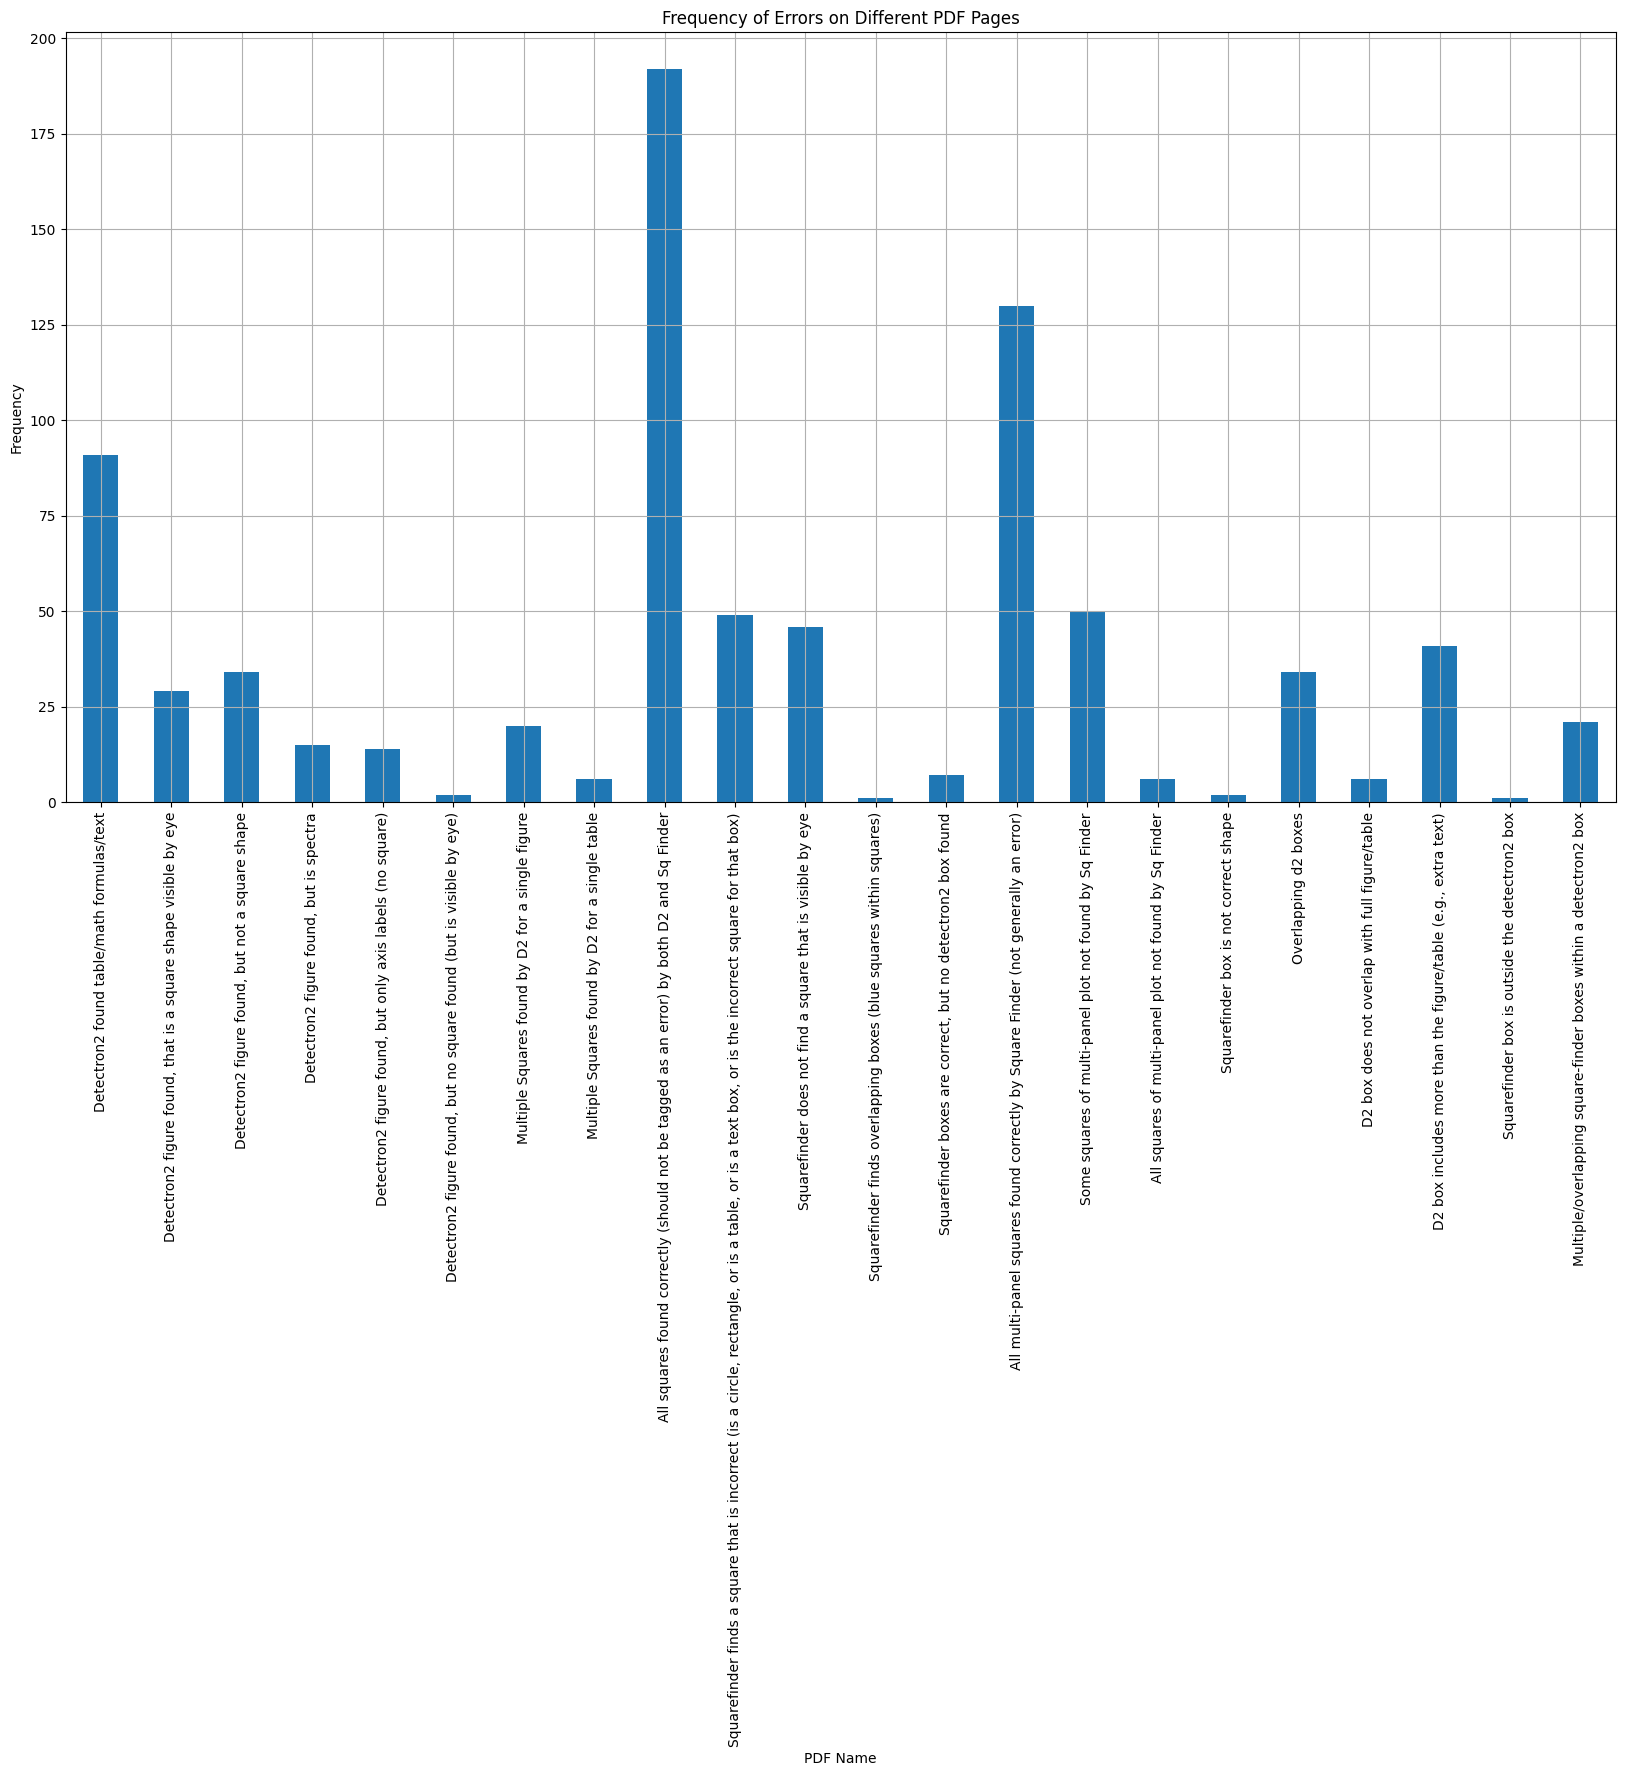

In [ ]:
# Frequency of errors in each Column:
plt.figure(figsize=(20, 10))
errors_per_pdf = df_error_profiles_filled_1.drop(columns='Article Name').sum(axis=0)
errors_per_pdf.plot(kind='bar', xlabel='PDF Name', ylabel='Frequency', title='Frequency of Errors on Different PDF Pages')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.grid()
plt.show()

# Save the plot as a PDF
# plt.savefig('/content/gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/March_2024_finding_boxes_algo/Excel_Sheet_of_Different_Error_Types/Analysis_on_Error_Types_Data_Dict/Saved_Viz_Error_Types/Plot_frequency_of_errors_on_different_PDF_pages.pdf')
# plt.show()

### Percentage bar chart of the errors:

### Bar Chart of 'Percentage of Errors per Column'

Error Counts: Detectron2 found table/math formulas/text                                                                                                            91
Detectron2 figure found, that is a square shape visible by eye                                                                                       29
Detectron2 figure found, but not a square shape                                                                                                      34
Detectron2 figure found, but is spectra                                                                                                              15
Detectron2 figure found, but only axis labels (no square)                                                                                            14
Detectron2 figure found, but no square found (but is visible by eye)                                                                                  2
Multiple Squares found by D2 for a single figure                          

<ipython-input-29-1ec29ffdc051>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


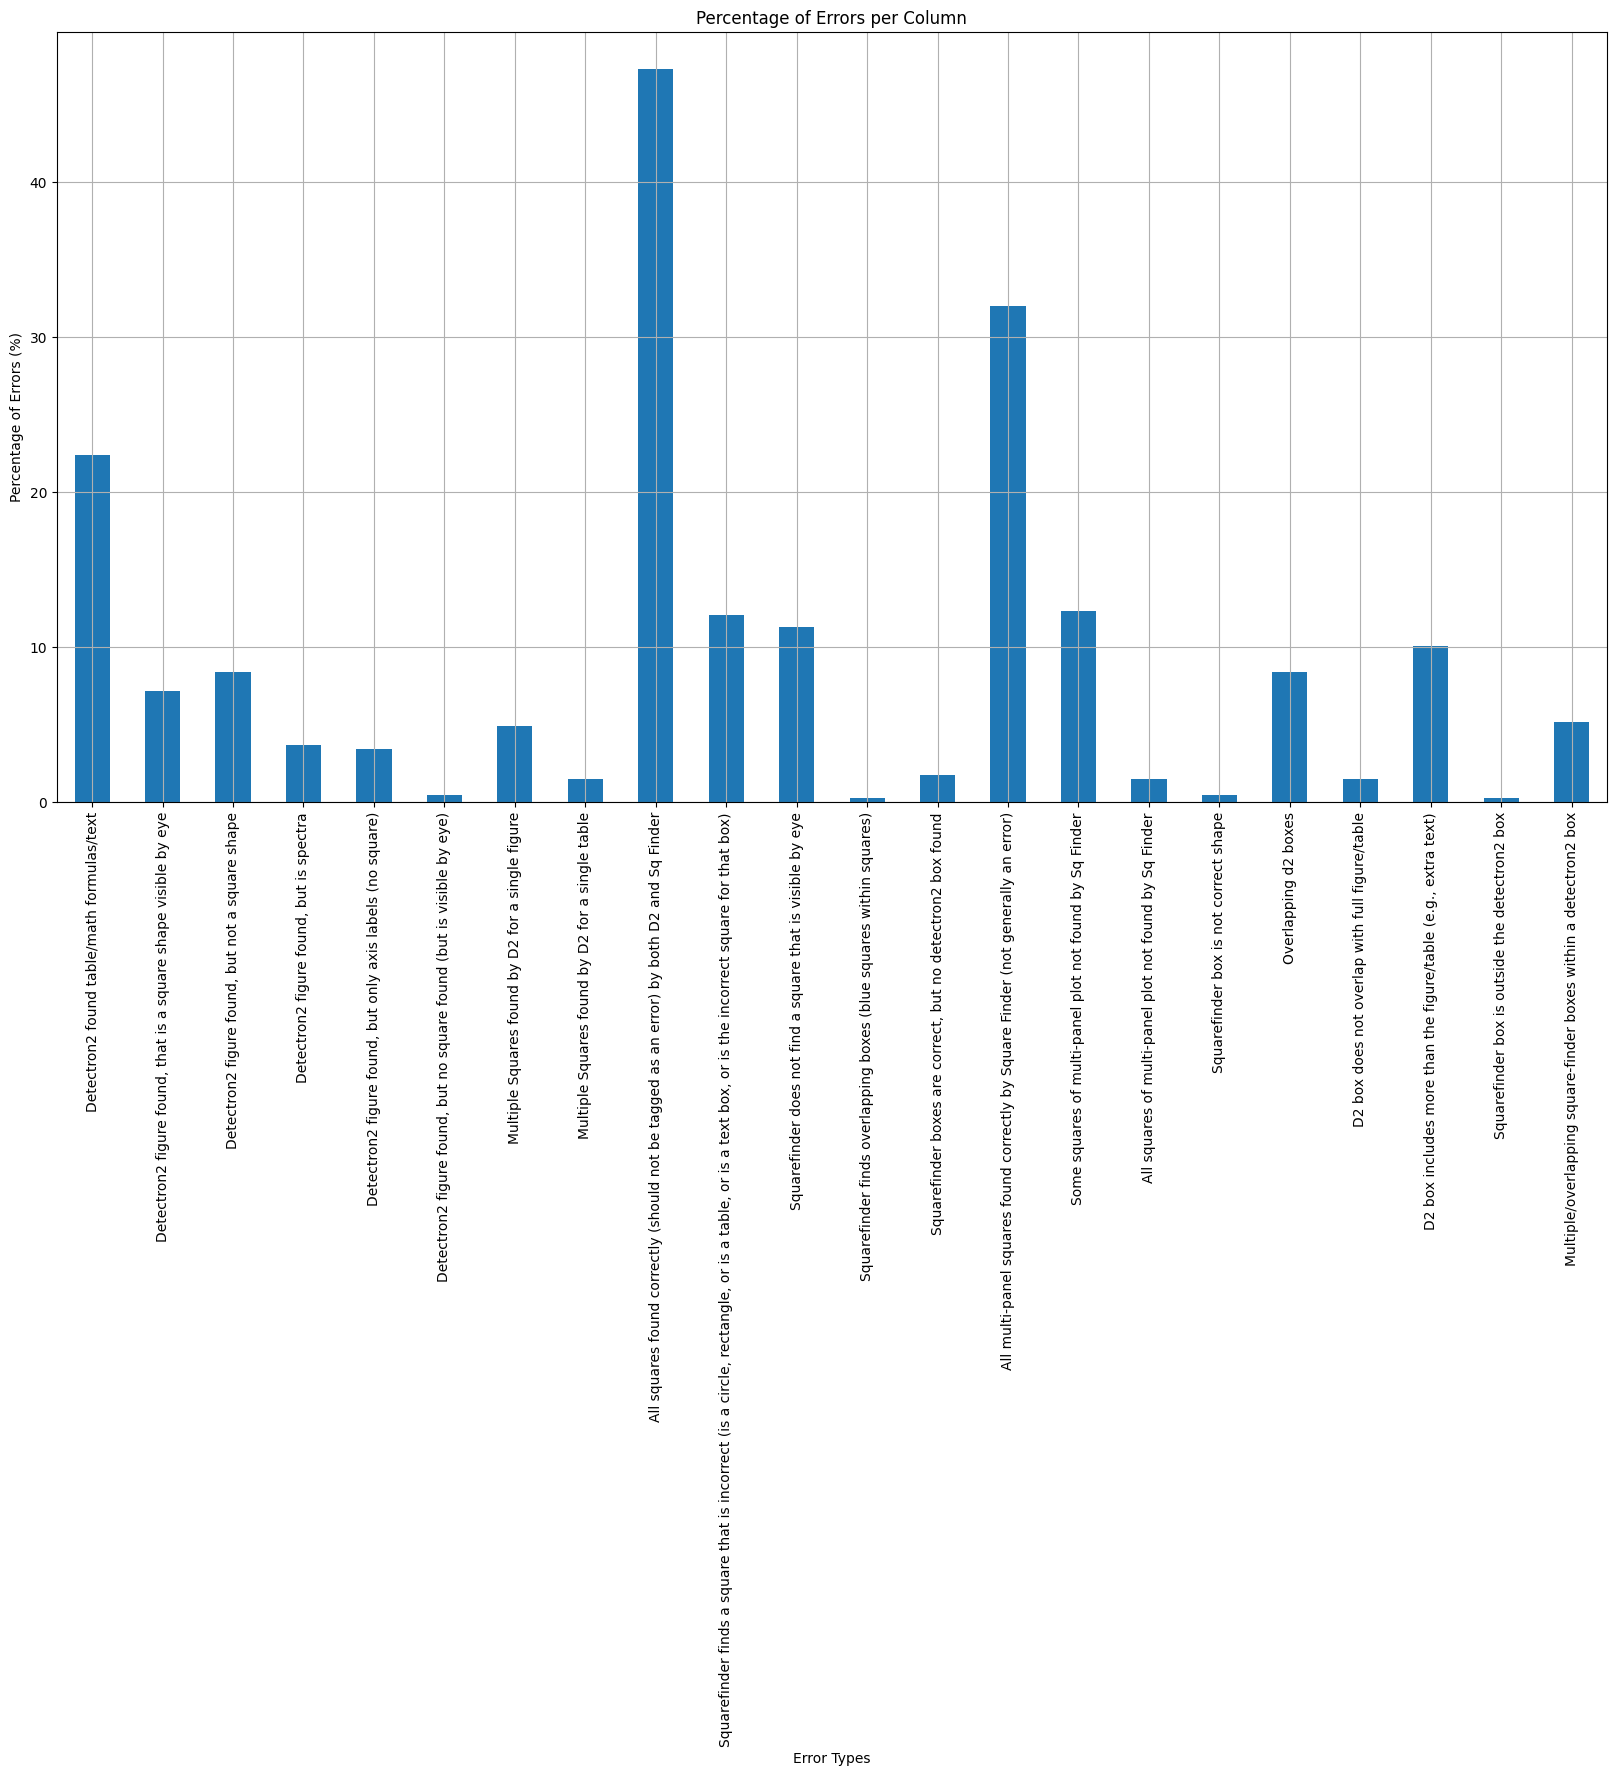

In [ ]:
# Calculate the count of errors per column (excluding the first column)
error_columns = df_error_profiles_filled_1.columns[1:]  # Assuming the first column is 'Article Name'
error_counts = df_error_profiles_filled_1[error_columns].sum()
print('Error Counts:', error_counts)

# Calculate the total number of rows
total_rows = df_error_profiles_filled_1.shape[0]
print('Total Rows:', total_rows)

# Calculate the percentage of errors per column
error_percentages = (error_counts / total_rows) * 100

# Plot the histogram of error percentages per column
plt.figure(figsize=(20, 10))  # Adjust the size for better readability
error_percentages.plot(kind='bar')
plt.xlabel('Error Types')
plt.ylabel('Percentage of Errors (%)')
plt.title('Bar Chart of Percentage of Errors per Column')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('/content/gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/March_2024_finding_boxes_algo/Excel_Sheet_of_Different_Error_Types/Analysis_on_Error_Types_Data_Dict/Saved_Viz_Error_Types/Bar Chart of Percentage of Errors per Column.pdf', bbox_inches='tight')

# Show the plot, always use plt.show() command after saving the figure so that as plot.show() clears the figure after displaying it
plt.show()

### Pie Chart of the above percentage:

<ipython-input-97-3080e6adc24e>:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


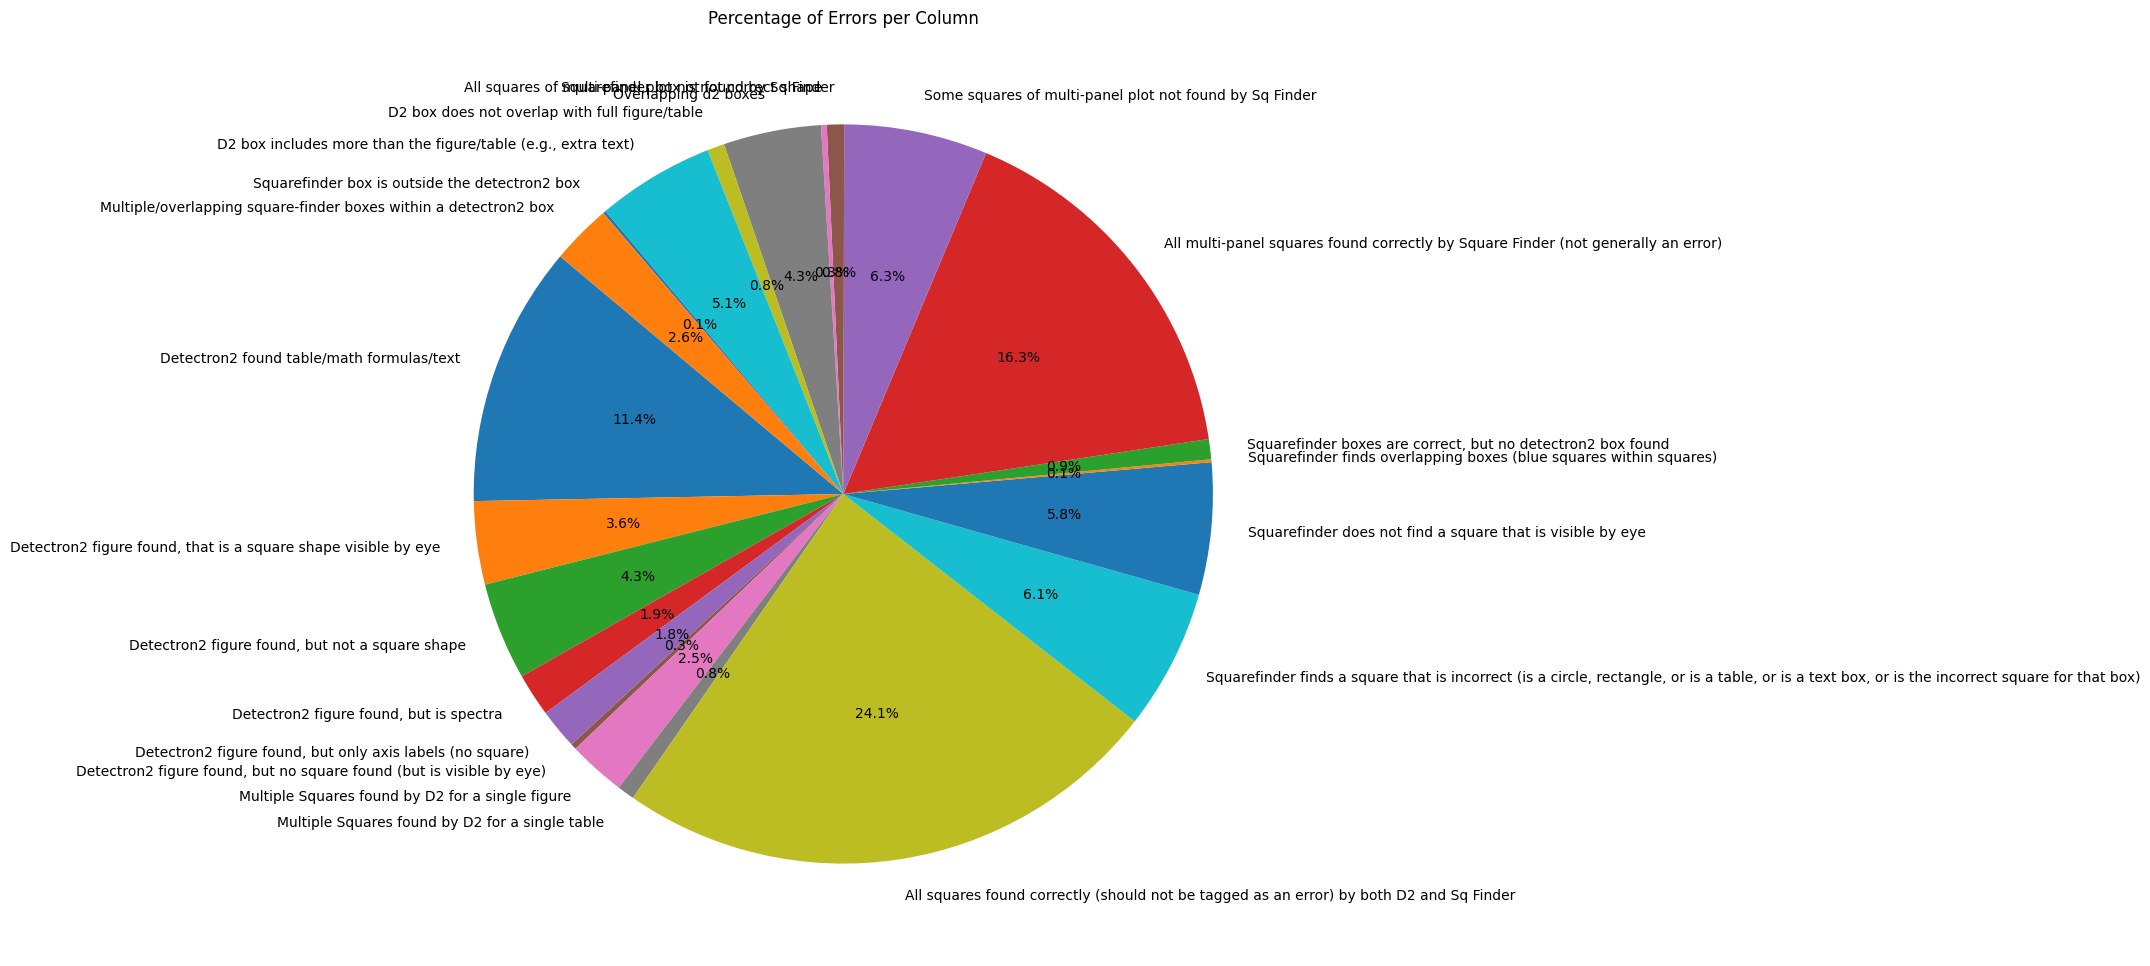

In [ ]:
# Plot the pie chart of error percentages per column
plt.figure(figsize=(12, 12))
error_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=False)
plt.ylabel('')  # Remove the y-label
plt.title('Percentage of Errors per Column')
plt.tight_layout()

# Show the pie chart
plt.show()

### Version 2 for Pie Chart:

### Top 5 of all the columns:

Error Counts: Detectron2 found table/math formulas/text                                                                                                            91
Detectron2 figure found, that is a square shape visible by eye                                                                                       29
Detectron2 figure found, but not a square shape                                                                                                      34
Detectron2 figure found, but is spectra                                                                                                              15
Detectron2 figure found, but only axis labels (no square)                                                                                            14
Detectron2 figure found, but no square found (but is visible by eye)                                                                                  2
Multiple Squares found by D2 for a single figure                          

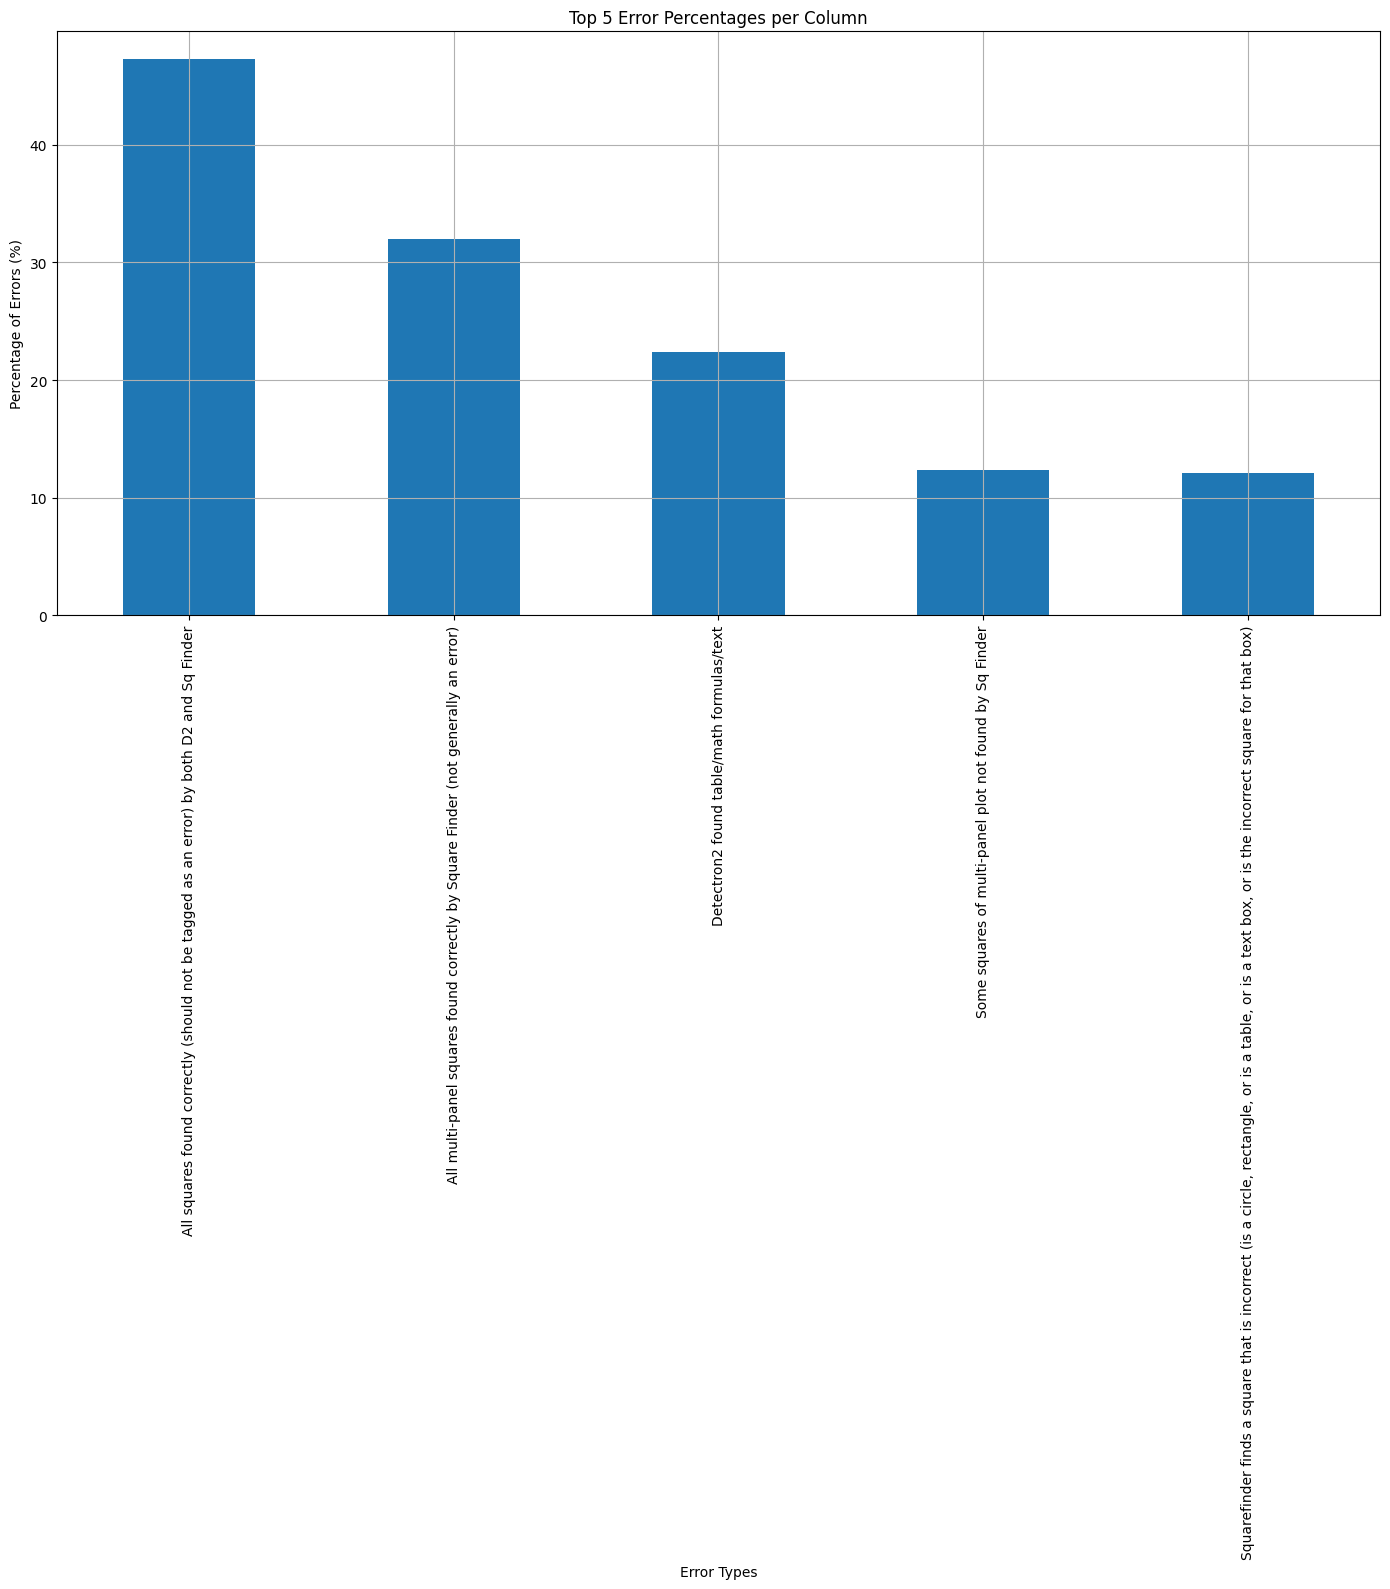

In [ ]:
# Calculate the count of errors per column (excluding the first column)
error_columns = df_error_profiles_filled_1.columns[1:]  # Assuming the first column is 'Article Name'
error_counts = df_error_profiles_filled_1[error_columns].sum()
print('Error Counts:', error_counts)

# Calculate the total number of rows
total_rows = df_error_profiles_filled_1.shape[0]
print('Total Rows:', total_rows)

# Calculate the percentage of errors per column
error_percentages = (error_counts / total_rows) * 100

# Sort error percentages in descending order and select the top 5
top_5_error_percentages = error_percentages.sort_values(ascending=False).head(5)
print('Top 5 Error Percentages:', top_5_error_percentages)

# Plot the histogram of top 5 error percentages per column
plt.figure(figsize=(14, 16))  # Adjust the size for better readability
top_5_error_percentages.plot(kind='bar')
plt.xlabel('Error Types')
plt.ylabel('Percentage of Errors (%)')
plt.title('Top 5 Error Percentages per Column')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()
plt.grid(True)

# Save the plot as a PDF
plt.savefig('/content/gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/March_2024_finding_boxes_algo/Excel_Sheet_of_Different_Error_Types/Analysis_on_Error_Types_Data_Dict/Saved_Viz_Error_Types/Bar_Chart_of_Top_Five_Percentages_of_Errors.pdf', bbox_inches='tight')

# Show the plot, always use plt.show() command after saving the figure so that as plot.show() clears the figure after displaying it
plt.show()

# Pie Chart of it:

Error Counts: Detectron2 found table/math formulas/text                                                                                                            91
Detectron2 figure found, that is a square shape visible by eye                                                                                       29
Detectron2 figure found, but not a square shape                                                                                                      34
Detectron2 figure found, but is spectra                                                                                                              15
Detectron2 figure found, but only axis labels (no square)                                                                                            14
Detectron2 figure found, but no square found (but is visible by eye)                                                                                  2
Multiple Squares found by D2 for a single figure                          

<ipython-input-99-922e7ff5b473>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


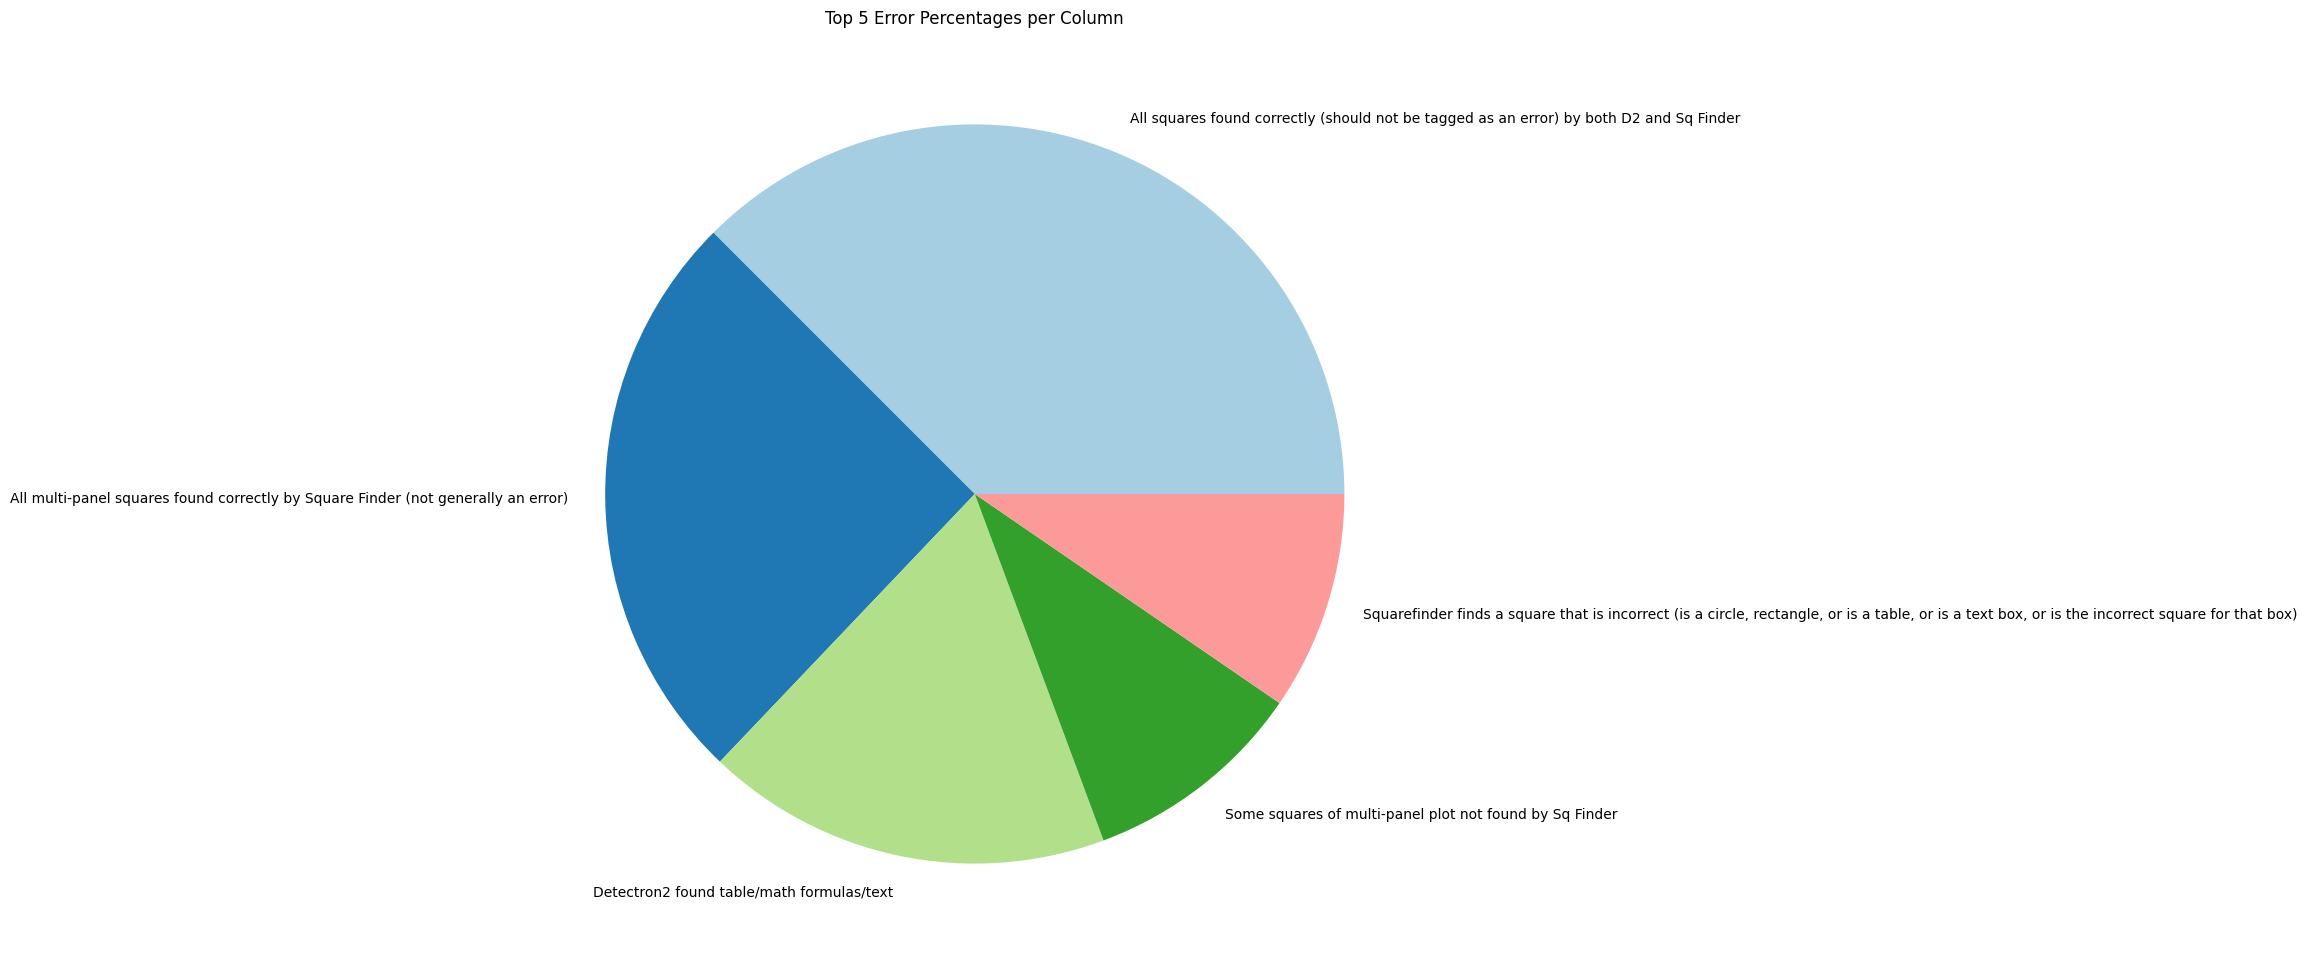

In [ ]:
# Calculate the count of errors per column (excluding the first column)
error_columns = df_error_profiles_filled_1.columns[1:]  # Assuming the first column is 'Article Name'
error_counts = df_error_profiles_filled_1[error_columns].sum()
print('Error Counts:', error_counts)

# Calculate the total number of rows
total_rows = df_error_profiles_filled_1.shape[0]
print('Total Rows:', total_rows)

# Calculate the percentage of errors per column
error_percentages = (error_counts / total_rows) * 100

# Sort error percentages in descending order and select the top 5
top_5_error_percentages = error_percentages.sort_values(ascending=False).head(5)
print('Top 5 Error Percentages:', top_5_error_percentages)

# Plot the pie chart of top 5 error percentages per column
plt.figure(figsize=(12, 12))
plt.pie(top_5_error_percentages, labels=top_5_error_percentages.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_5_error_percentages))))

# Add a title
plt.title('Top 5 Error Percentages per Column')

# Adjust layout for better fit
plt.tight_layout()

# Show the pie chart
plt.show()

### Exact Correct Version of Pie Chart with right percentages:

### Pie_Chart_of_Top_Five_Percentages_of_Errors

Error Counts: Detectron2 found table/math formulas/text                                                                                                            91
Detectron2 figure found, that is a square shape visible by eye                                                                                       29
Detectron2 figure found, but not a square shape                                                                                                      34
Detectron2 figure found, but is spectra                                                                                                              15
Detectron2 figure found, but only axis labels (no square)                                                                                            14
Detectron2 figure found, but no square found (but is visible by eye)                                                                                  2
Multiple Squares found by D2 for a single figure                          

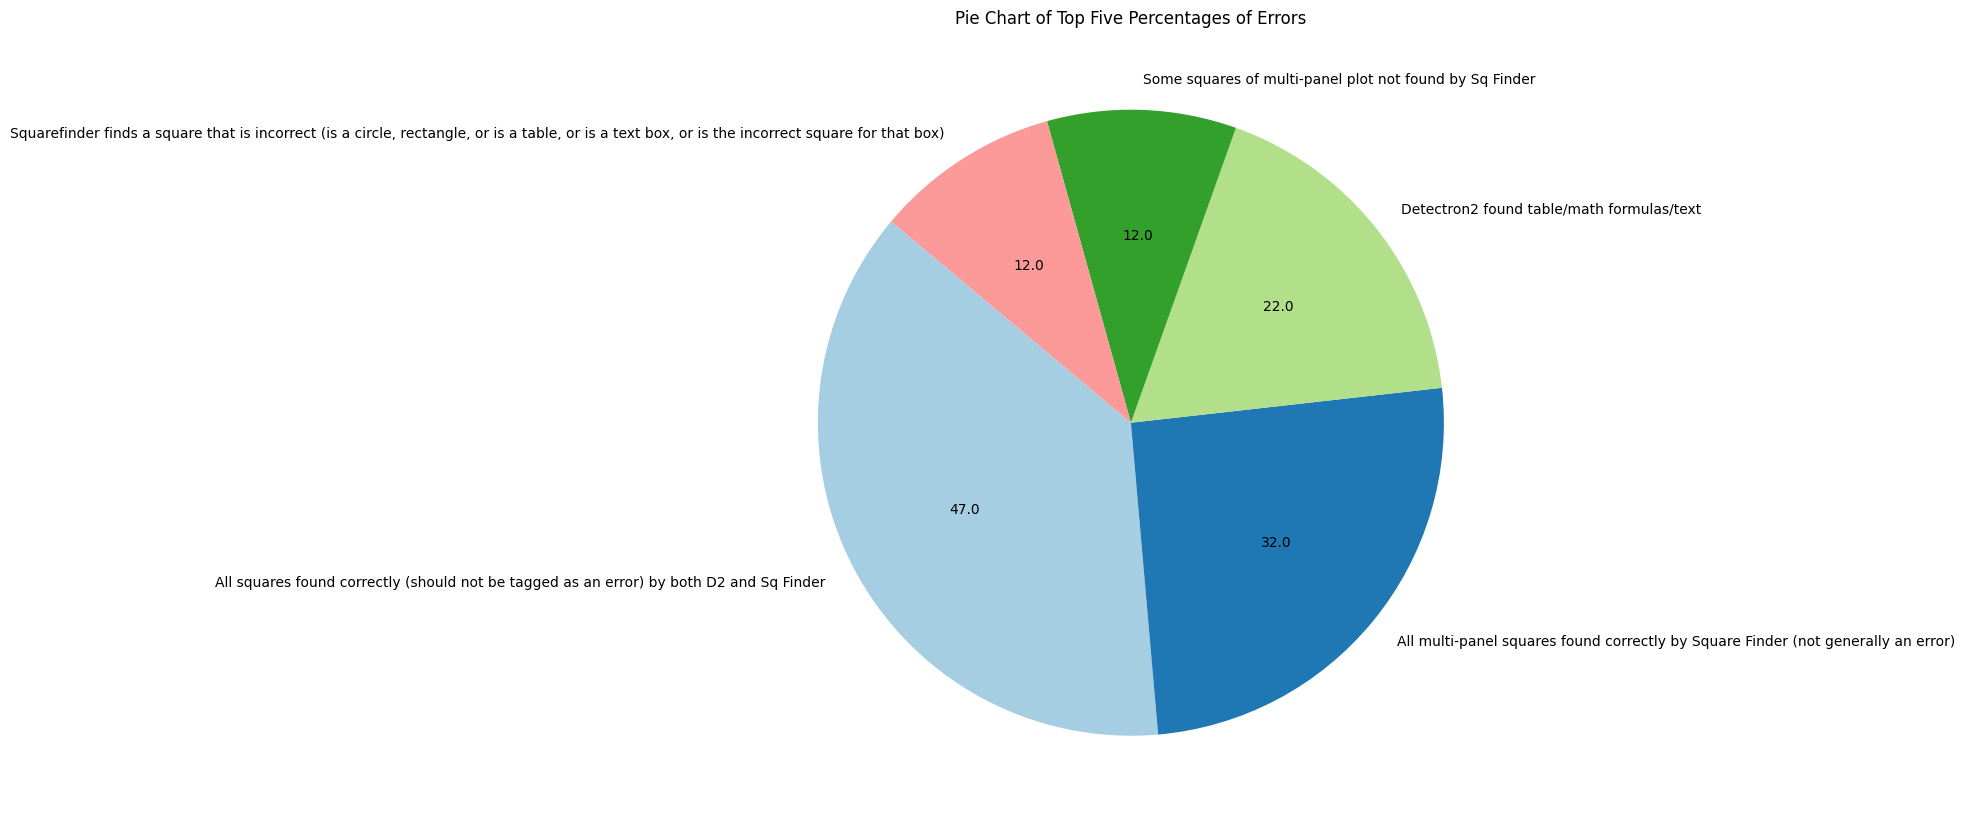

In [ ]:
# Calculate the count of errors per column (excluding the first column)
error_columns = df_error_profiles_filled_1.columns[1:]  # Assuming the first column is 'Article Name'
error_counts = df_error_profiles_filled_1[error_columns].sum()
print('Error Counts:', error_counts)

# Calculate the total number of rows
total_rows = df_error_profiles_filled_1.shape[0]
print('Total Rows:', total_rows)

# Calculate the percentage of errors per column
error_percentages = (error_counts / total_rows) * 100

# Sort error percentages in descending order and select the top 5
top_5_error_percentages = error_percentages.sort_values(ascending=False).head(5)
print('Top 5 Error Percentages:', top_5_error_percentages)

# Function to display actual percentages on the pie chart
def absolute_value(val):
    a = int(val / 100. * top_5_error_percentages.sum())
    return '{:.1f}'.format(a)

# Plot the pie chart of top 5 error percentages per column
plt.figure(figsize=(16, 12))
plt.pie(top_5_error_percentages, labels=top_5_error_percentages.index, autopct=absolute_value, startangle=140, colors=plt.cm.Paired(range(len(top_5_error_percentages))))

# Add a title
plt.title('Pie Chart of Top Five Percentages of Errors')

# Adjust layout for better fit
plt.tight_layout()

# Save the plot as a PDF
plt.savefig('/content/gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/March_2024_finding_boxes_algo/Excel_Sheet_of_Different_Error_Types/Analysis_on_Error_Types_Data_Dict/Saved_Viz_Error_Types/Pie_Chart_of_Top_Five_Percentages_of_Errors.pdf', bbox_inches='tight')

# Show the plot, always use plt.show() command after saving the figure so that as plot.show() clears the figure after displaying it
plt.show()

### PDF Names with 4 or more errors:

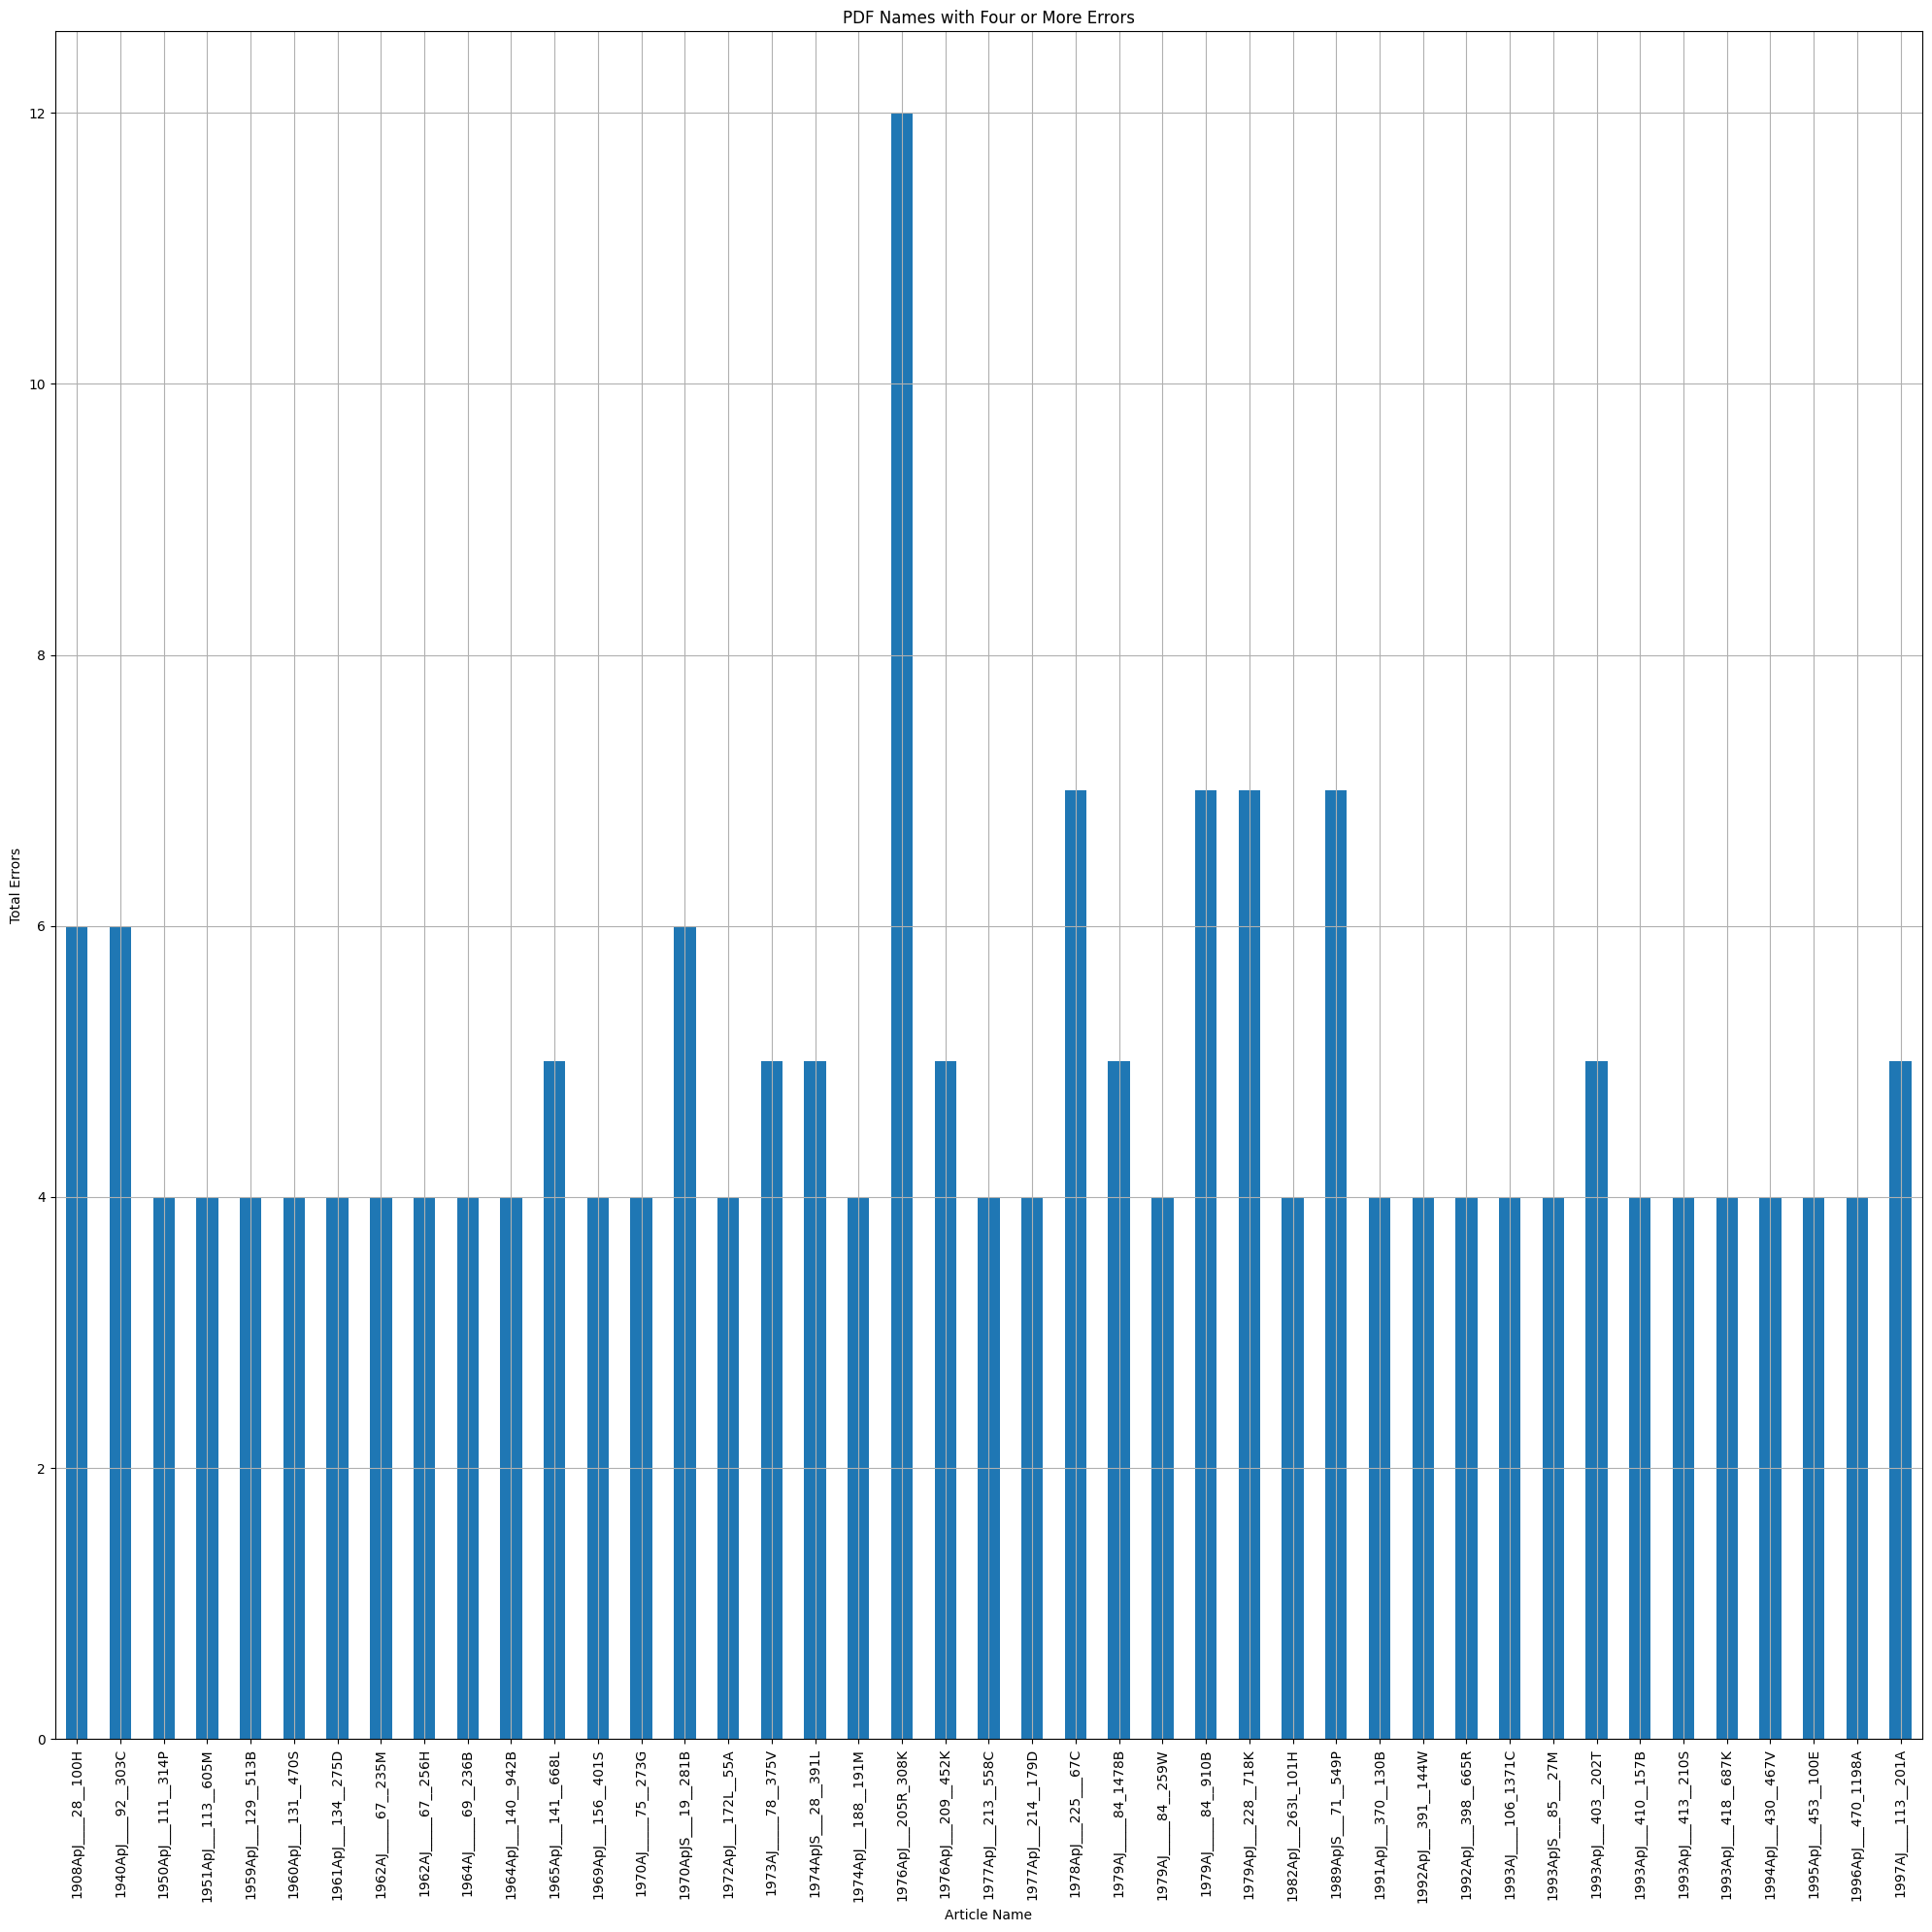

In [ ]:
# Group by Article Name and sum errors
errors_per_article = df_error_profiles_filled_1.groupby('Article Name').sum()

# Calculate total errors per Article
errors_per_article['Total Errors'] = errors_per_article.sum(axis=1)

# Filter PDF names with four or more errors associated with them
errors_per_article_filtered = errors_per_article[errors_per_article['Total Errors'] >= 4]

# Plot errors per PDF
plt.figure(figsize=(20, 20))
errors_per_article_filtered['Total Errors'].plot(kind='bar', xlabel='Article Name', ylabel='Total Errors', title='PDF Names with Four or More Errors')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.grid()

# Save the plot as a PDF
plt.savefig('/content/gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/March_2024_finding_boxes_algo/Excel_Sheet_of_Different_Error_Types/Analysis_on_Error_Types_Data_Dict/Saved_Viz_Error_Types/PDF_Names_with_four_or_more_errors.pdf')

plt.show()

### Percentage bar chart of the errors:

<ipython-input-36-a9f664d97b12>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


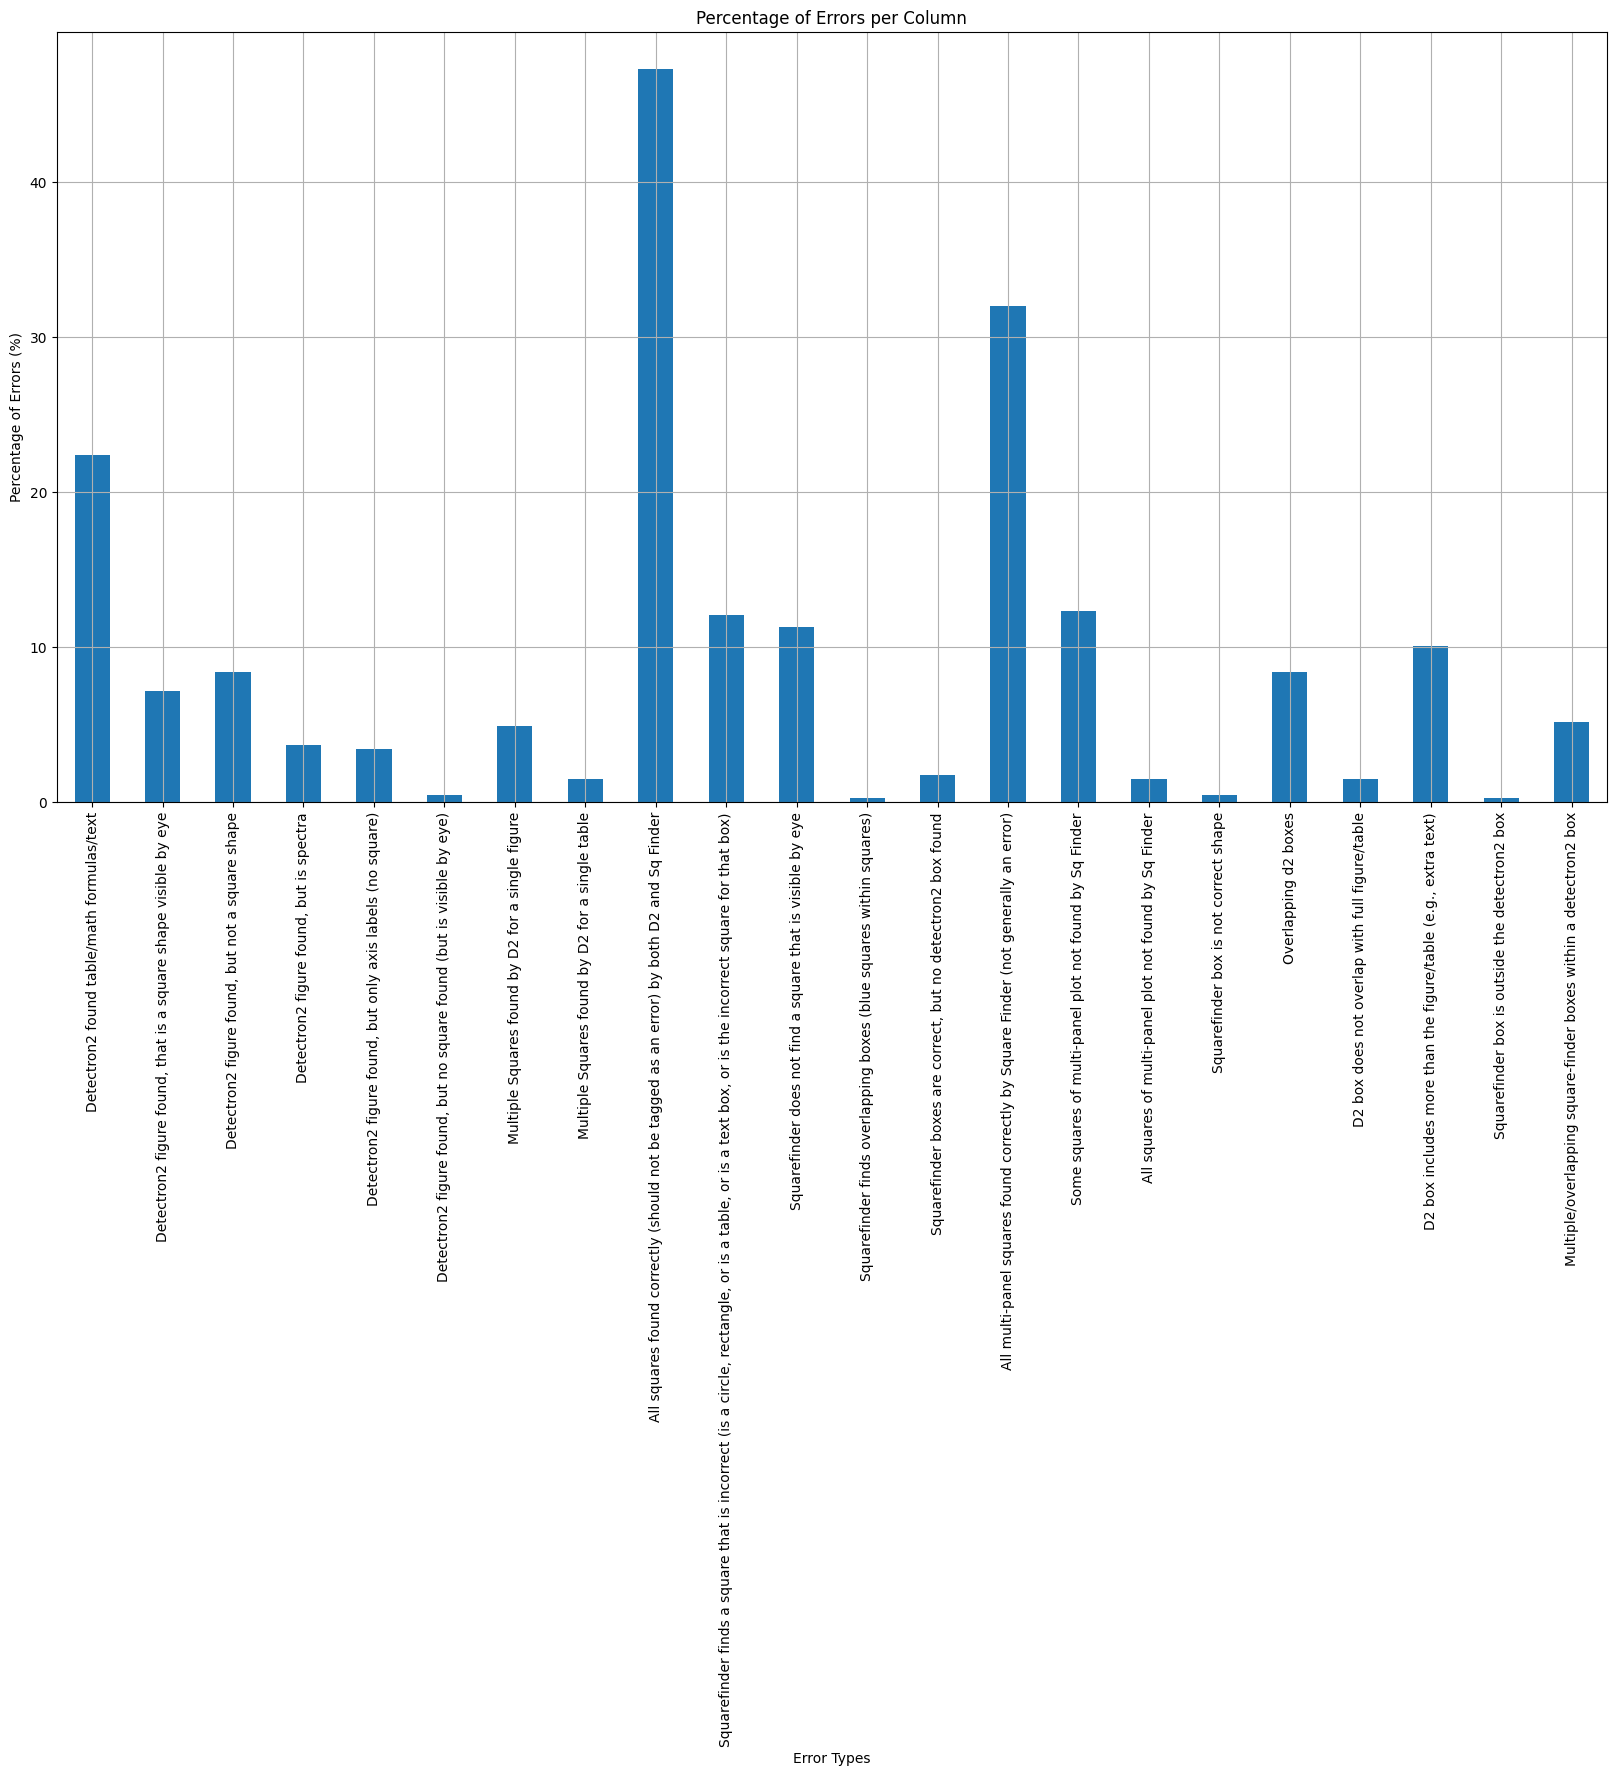

In [ ]:
# Calculate the count of errors per column (excluding the first column)
error_columns = df_error_profiles_filled_1.columns[1:]  # Assuming the first column is 'Article Name'
error_counts = df_error_profiles_filled_1[error_columns].sum()

# Calculate the total number of rows
total_rows = df_error_profiles_filled_1.shape[0]

# Calculate the percentage of errors per column
error_percentages = (error_counts / total_rows) * 100

# Plot the histogram of error percentages per column
plt.figure(figsize=(20, 10))  # Adjust the size for better readability
error_percentages.plot(kind='bar')
plt.xlabel('Error Types')
plt.ylabel('Percentage of Errors (%)')
plt.title('Percentage of Errors per Column')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.tight_layout()
plt.grid(True)

# Show the bar plot
plt.show()